# Airbnb Listing EDA

This project involves performing an exploratory data analysis (EDA) on Airbnb listings data for a particular city. The analysis will focus on factors such as price, availability, location, and property type to identify trends and patterns in the demand for Airbnb listings in the city. The project will include data cleaning, visualization, and statistical analysis using tools such as Python and Jupyter Notebook. Data: http://insideairbnb.com/get-the-data/

The source file used is the data for Amsterdam city in the Netherlands

In [47]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns



In [14]:
%matplotlib inline

In [15]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle
data =pd.read_csv("Amsterdam_listings.csv")

#examing head of BlackFriday csv file 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [16]:
data.shape

(7608, 18)

In [17]:
#checking type of every column in the dataset

data.dtypes



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [19]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

<Axes: >

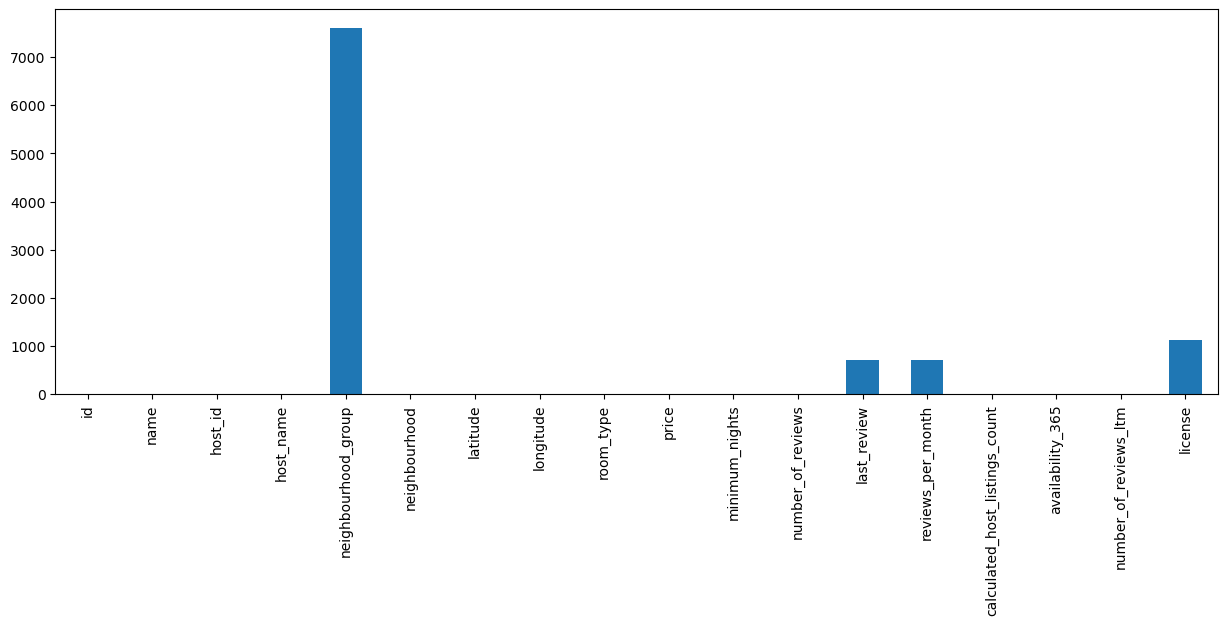

In [20]:
data.isnull().sum().plot.bar(figsize=(15,5))

In [21]:
#dropping columns that are not required or contains null
data.drop(['id','neighbourhood_group','license'], axis=1, inplace=True)



In [22]:
data.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40
1,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0
2,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1
3,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0
4,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20


In [23]:

data.fillna(0, inplace=True)

In [24]:
data.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [37]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000
mean,1.032177e+08,52.366725,4.889936,251.065589,4.914564,47.499211,1.061130,1.798896,79.586619,11.798896
std,1.393419e+08,0.017068,0.035059,263.170218,33.263777,106.402516,2.266514,2.590756,106.483001,33.469905
min,3.159000e+03,52.290340,4.755710,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.937172e+06,52.355890,4.866060,148.000000,2.000000,3.000000,0.200000,1.000000,0.000000,0.000000
50%,3.501297e+07,52.365980,4.887770,202.000000,3.000000,11.000000,0.480000,1.000000,21.000000,3.000000
75%,1.402245e+08,52.376470,4.908300,300.000000,4.000000,40.000000,1.110000,1.000000,145.000000,9.000000
max,5.183111e+08,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


C:\Users\alashin\AppData\Local\Temp\ipykernel_36712\3906517760.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

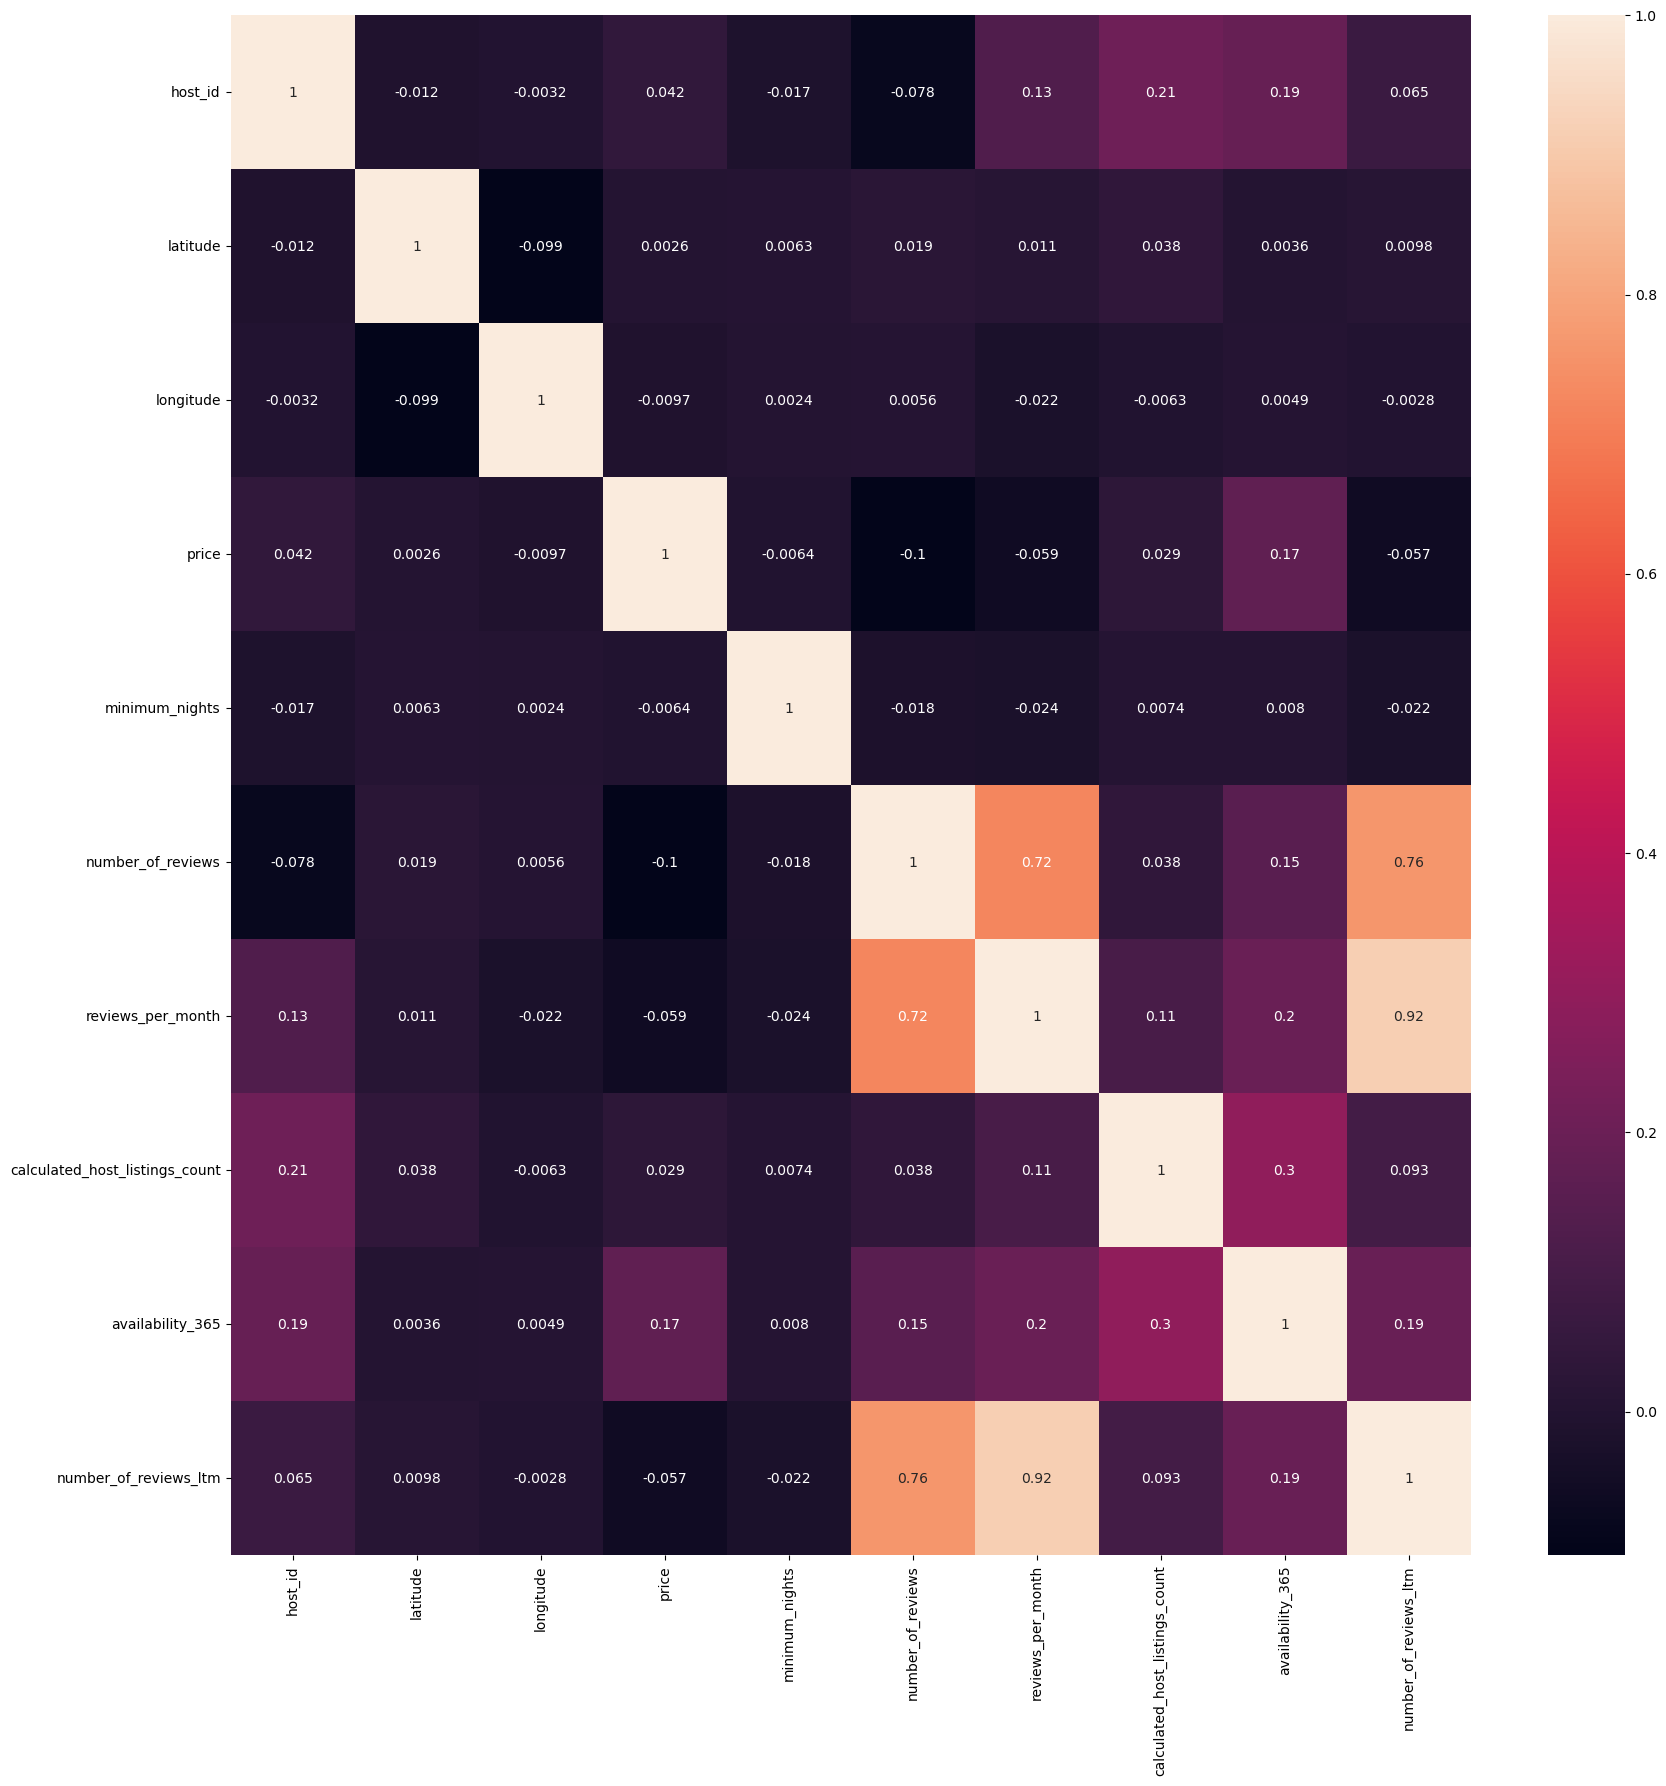

In [94]:
# Checking the correlation between features

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

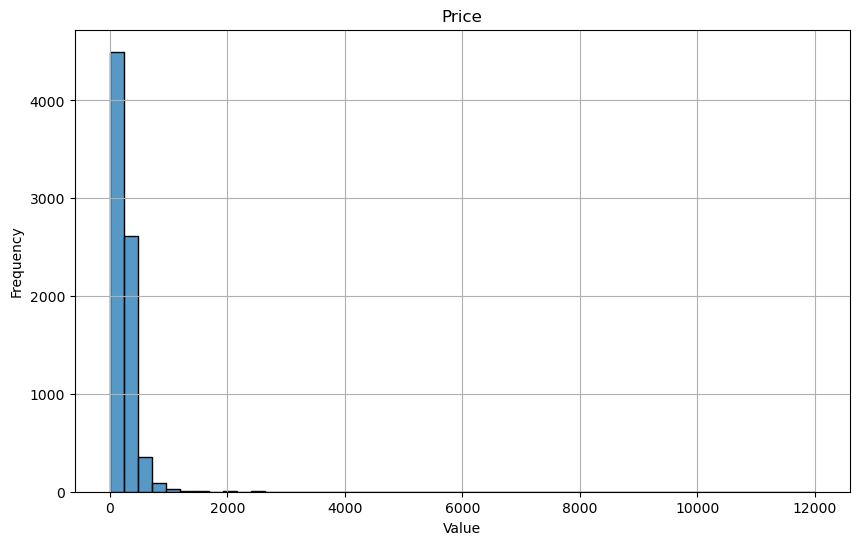

In [95]:
# Price Distribution

plt.figure(figsize=(10, 6))
#plt.hist(data['price'], bins=50, color='blue', alpha=0.7)  
sns.histplot(data=data, x='price', bins=50)
plt.title('Price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [36]:
# Checking the distinct number of values in neighbourhood
data.neighbourhood.unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Centrum-Oost',
       'De Pijp - Rivierenbuurt', 'Oud-Oost', 'Centrum-West',
       'De Baarsjes - Oud-West', 'Zuid', 'Bos en Lommer', 'Slotervaart',
       'Noord-Oost', 'Westerpark', 'Watergraafsmeer',
       'Buitenveldert - Zuidas', 'Oud-Noord', 'Bijlmer-Centrum',
       'IJburg - Zeeburgereiland', 'Noord-West',
       'Geuzenveld - Slotermeer', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Gaasperdam - Driemond', 'Bijlmer-Oost'], dtype=object)

In [35]:
# checking the number of listing per neighbourhood

highest_neighbourhood = data.neighbourhood.value_counts()

highest_neighbourhood 

De Baarsjes - Oud-West                    1260
Centrum-West                               969
De Pijp - Rivierenbuurt                    872
Centrum-Oost                               730
Westerpark                                 536
Zuid                                       510
Oud-Oost                                   451
Bos en Lommer                              382
Oud-Noord                                  346
Oostelijk Havengebied - Indische Buurt     286
Watergraafsmeer                            231
Noord-West                                 198
IJburg - Zeeburgereiland                   164
Slotervaart                                149
Noord-Oost                                 120
Geuzenveld - Slotermeer                     92
Buitenveldert - Zuidas                      81
De Aker - Nieuw Sloten                      62
Gaasperdam - Driemond                       49
Bijlmer-Centrum                             46
Osdorp                                      44
Bijlmer-Oost 

<Axes: >

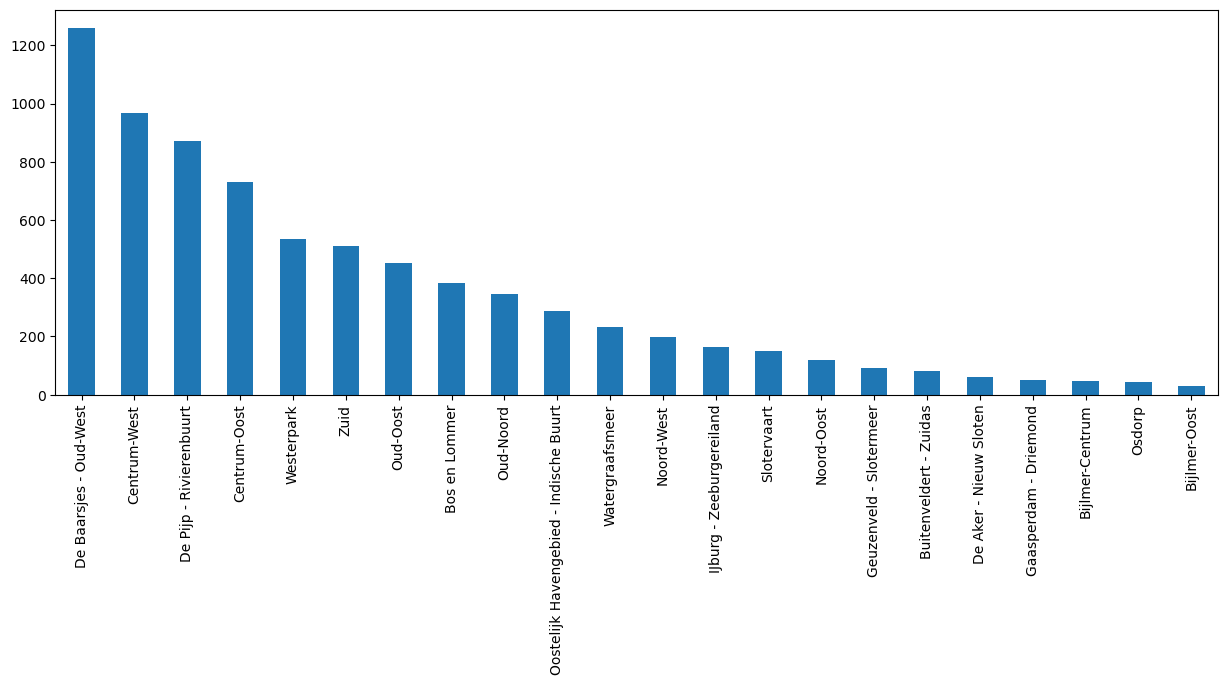

In [31]:
# Visualize the number of listing per neighbourhood

highest_neighbourhood.plot.bar(figsize=(15,5))

In [70]:
# checking the price per neighbourhood

price_per_neighbourhood = data.groupby('neighbourhood')['price'].sum().reset_index()

price_per_neighbourhood.head()


,neighbourhood,price
0,Bijlmer-Centrum,6580
1,Bijlmer-Oost,4635
2,Bos en Lommer,75946
3,Buitenveldert - Zuidas,15263
4,Centrum-Oost,225497


<Axes: >

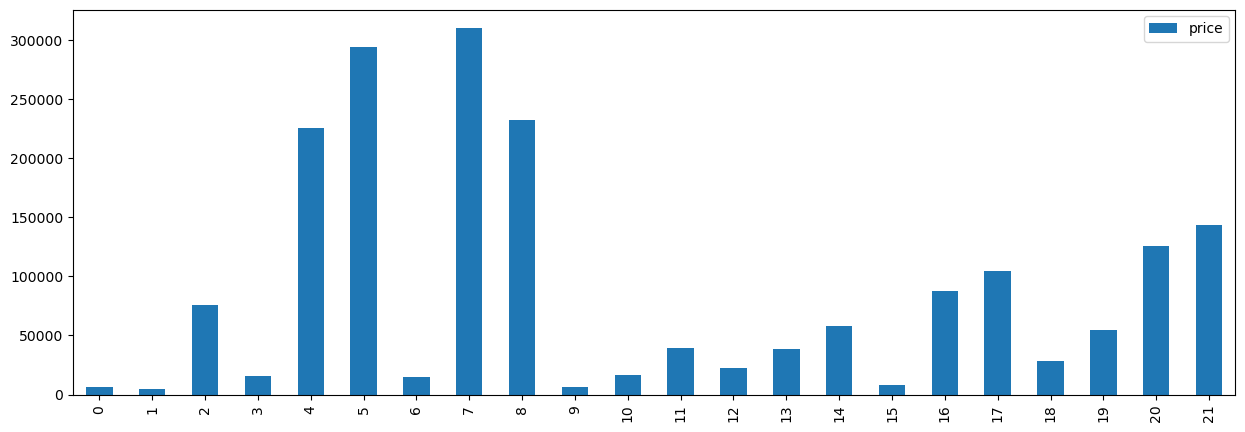

In [83]:
# Visualize  the price per neighbourhood

price_per_neighbourhood.plot.bar(figsize=(15,5))

In [84]:
# checking the number of listing per room type

highest_room_type = data.room_type.value_counts()

highest_room_type

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

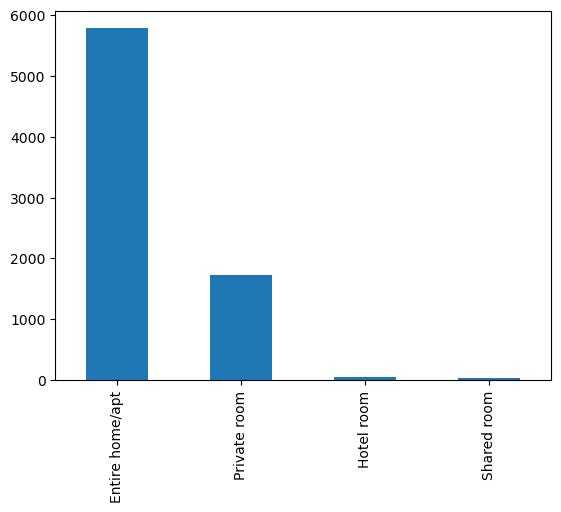

In [80]:
# Checking the number of listing per room type

data['room_type'].value_counts().plot(kind='bar')
plt.show()

In [82]:
# checking the price per room type

price_per_room_type = data.groupby('room_type')['price'].sum().reset_index()

price_per_room_type.head()


,room_type,price
0,Entire home/apt,1575308
1,Hotel room,13448
2,Private room,314399
3,Shared room,6952


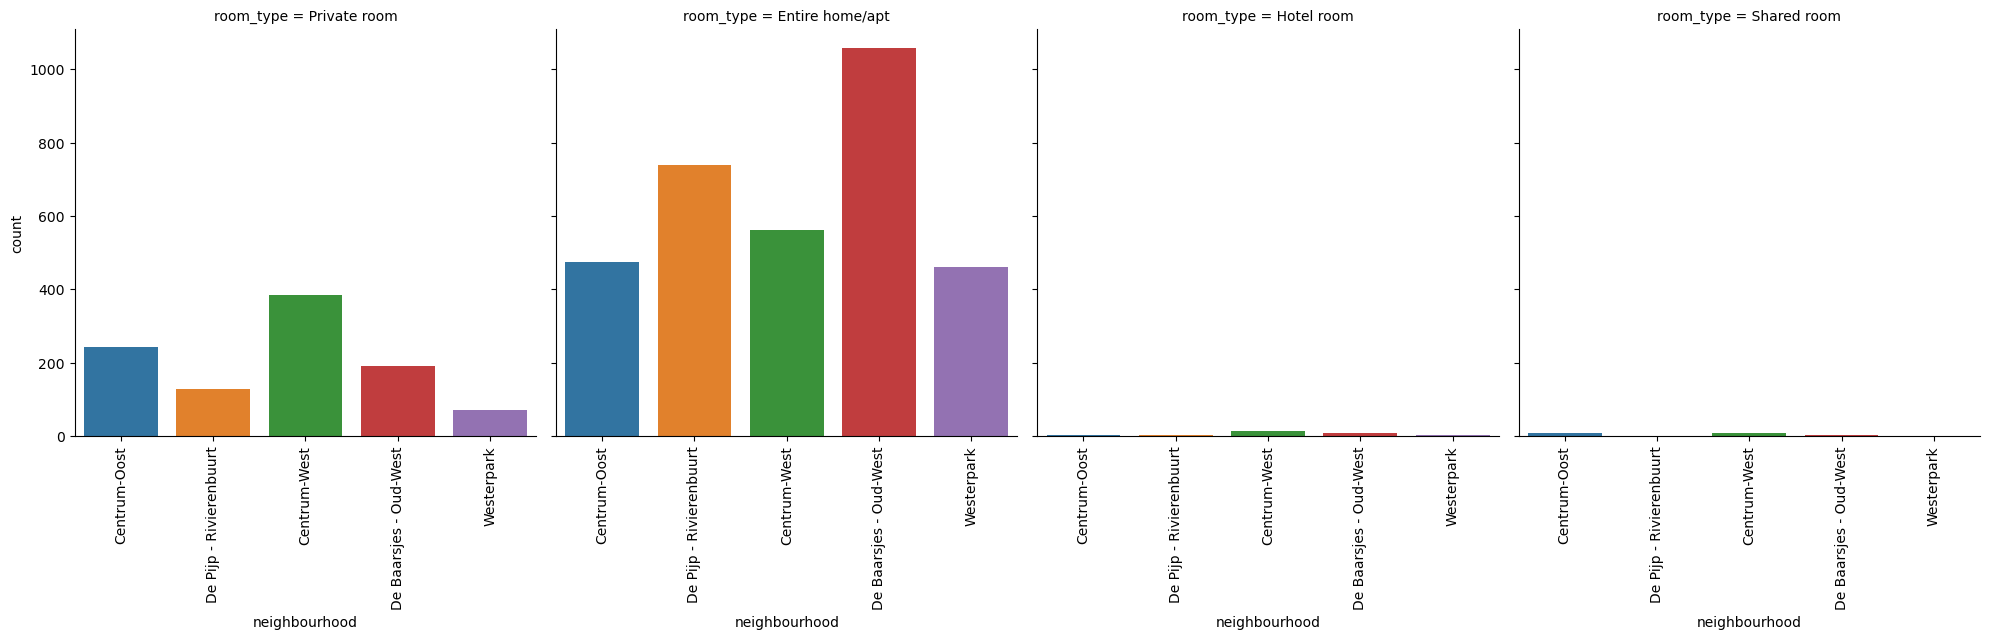

In [90]:
# Checking the relationship between neighbourhood and room type


top_neighbourhood=data.loc[data['neighbourhood'].isin(['De Baarsjes - Oud-West','Centrum-West', 'De Pijp - Rivierenbuurt', 
                                                       'Centrum-Oost', 'Westerpark'])]
viz=sns.catplot(x='neighbourhood', col='room_type', data=top_neighbourhood, kind='count')
viz.set_xticklabels(rotation=90)



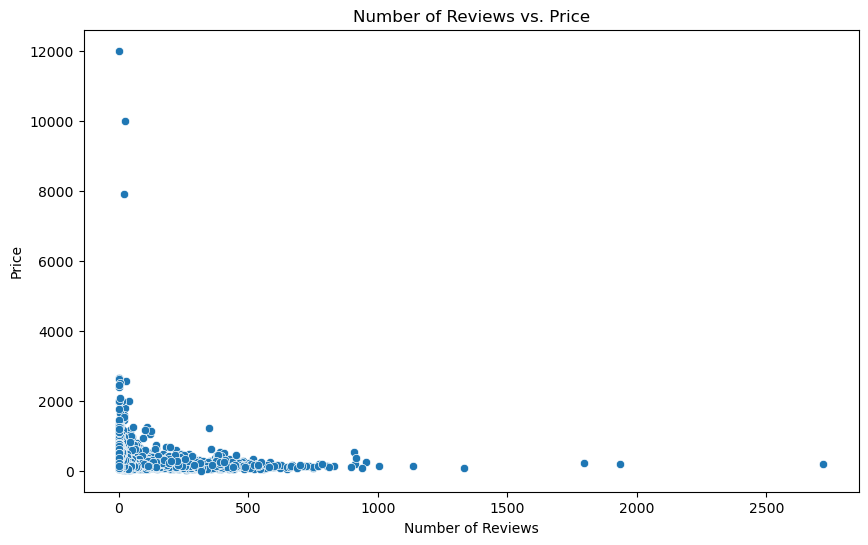

In [91]:

# Checking the relationship between the number of reviews and prices.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_reviews', y='price')
plt.title('Number of Reviews vs. Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()



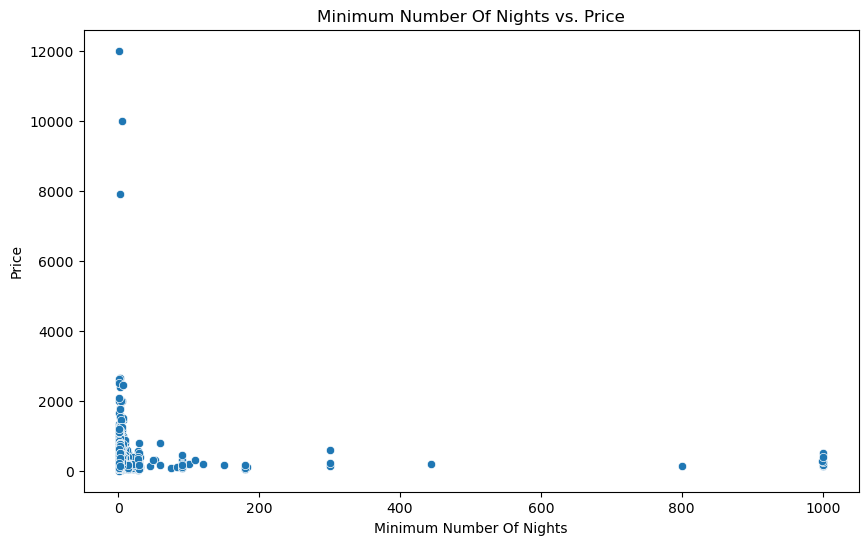

In [92]:
# Checking the relationship between the number of reviews and prices.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='minimum_nights', y='price')
plt.title('Minimum Number Of Nights vs. Price')
plt.xlabel('Minimum Number Of Nights')
plt.ylabel('Price')
plt.show()
